<font color='blue'><h1>Transition Énergétique et Écologique : Analyse des textes courts<br></h1> <h2>Date d'extraction : 01/01/2023-23/04/2023</h2></font>
    
    
    

In [2]:
import pandas as pd

In [3]:
df_Sum = pd.read_excel('PPD_Scrapping_Sum_Up.xlsx')
df_Sum_Content = pd.DataFrame(df_Sum, columns = ["Content", "Date"])
df_Sum_Content


,Content,Date
0,"Ah, en effet..._x000D_\nLa transition écologiq...",2023-01-01
1,Méthode pour une transition écologique dans le...,2023-01-01
2,Enseignement agricole et transition écologique...,2023-01-01
3,la pollueuse de notre planète qui a des intérê...,2023-01-01
4,Quand la transition écologique bouscule la pol...,2023-01-01
...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...",2023-04-22
4289,�� Pour profiter au mieux de la transition #én...,2023-04-22
4290,"�� En conclusion, la logistique urbaine est un...",2023-04-22
4291,"Pour aller + loin, rejoignez notre webinaire a...",2023-04-22


In [75]:
df_TEner = pd.read_excel('PPD_Transition_Energetique_Scrapping.xlsx')
df_TEner_Content = pd.DataFrame(df_TEner, columns = ["Content", "Date"])
df_TEner_Content


,Content,Date
0,Vœux 2023: le Président de l’exécutif de la CT...,2023-01-01
1,Ceux qui ont décidé des objectifs en terme de ...,2023-01-01
2,"Notre transition énergétique, nous l'avons fai...",2023-01-01
3,"""La France a réduit la part de l'électricité p...",2023-01-01
4,Tres bonne année et #IESF à bientôt sur l'ant...,2023-01-01
...,...,...
2144,"Ils sont incompétents, ils n'ont rien réformé ...",2023-04-22
2145,_xDCA1__xD83D_ Pour profiter au mieux de la tr...,2023-04-22
2146,"_xDF0D__xD83C_ En conclusion, la logistique ur...",2023-04-22
2147,"Pour aller + loin, rejoignez notre webinaire a...",2023-04-22


In [76]:
df_TEco = pd.read_excel('PPD_Transition_Ecologique_Scrapping.xlsx')
df_TEco_Content = pd.DataFrame(df_TEco, columns = ["Content", "Date"])

df_TEco_Content

,Content,Date
0,"Ah, en effet..._x000D_\nLa transition écologiq...",2023-01-01
1,Méthode pour une transition écologique dans le...,2023-01-01
2,Enseignement agricole et transition écologique...,2023-01-01
3,la pollueuse de notre planète qui a des intérê...,2023-01-01
4,Quand la transition écologique bouscule la pol...,2023-01-01
...,...,...
2139,ON NE JOUE PAS AVEC LA VIE DES GENS =_x000D_\n...,2023-04-22
2140,"Christophe Béchu : ""Je suis fier d'annoncer qu...",2023-04-22
2141,100 propositions pour accélérer la transition ...,2023-04-22
2142,"En fait, il faut imposer aux banques de financ...",2023-04-22


<h2><font color='green'>Nettoyage des trois datasets </font></h2>

In [6]:
import re
import string
import nltk
from nltk.tokenize import TweetTokenizer


In [7]:
def delete_extra_spaces(txt):
    txt = re.sub(' +', ' ', txt)
    return txt

def delete_punct(txt):
    txt = "".join([i for i in txt if i not in string.punctuation])
    txt = " ".join(re.findall(r"\w*[a-zA-z]\w*", txt))
    return txt

def set_lower_case(txt):
    txt = "".join([i.lower() for i in txt if i not in string.punctuation])
    return txt

def tokenizing_nltk(txt):
    if not txt:
        print('Test, cellules vides')
        text = ''
    txt = nltk.tokenize.word_tokenize(txt)
    tweet = TweetTokenizer()  
    return txt

def cleaningDfMonth(dfMonth):

    dfMonthTmp = dfMonth["Content"].apply(delete_extra_spaces)
    dfMonthTmp = dfMonthTmp.apply(delete_punct)
    dfMonthTmp = dfMonthTmp.apply(set_lower_case)
    dfMonthTmp = dfMonthTmp.str.replace('[^\w\s#@/:%.,_-]', ' ', flags=re.UNICODE)
    return dfMonthTmp

def tokenizing_nltkplus(txt):
    if not txt:
        print('TEST TEST.')
        text = ''
    tweet = TweetTokenizer()
    tweet.tokenize(txt)    
    return txt

df_Sum_Clean = cleaningDfMonth(df_Sum_Content)
df_Sum_Cleaned = pd.DataFrame(df_Sum_Clean, columns=["Content"])




def tokenize():
    retab=[]
    tab=[]
    for each in df_Sum_Cleaned["Content"]:
        element = tokenizing_nltkplus(each)
        tab.append(element)
        retab.append(tab)
    return tab

df_Sum_Tok = pd.DataFrame(tokenize(), columns=["Content"])

df_Sum_Tok


,Content
0,ah en effetx000d la transition écologique est ...
1,méthode pour une transition écologique dans le...
2,enseignement agricole et transition écologique...
3,la pollueuse de notre planète qui a des intérê...
4,quand la transition écologique bouscule la pol...
...,...
4288,ils sont incompétents ils nont rien réformé al...
4289,pour profiter au mieux de la transition énergé...
4290,en conclusion la logistique urbaine est un enj...
4291,pour aller loin rejoignez notre webinaire avec...


In [8]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('french')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmare\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gmare\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\gmare\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [89]:
dfst = pd.read_excel('stopwords-fr.xlsx')

def get_all_stopwords():
    tb=[]
    for stp in dfst["stopwords-fr"]:
        tb.append(stp)        
    return tb

stopwords_fr = get_all_stopwords()
stopwords_all = nltk.corpus.stopwords.words('english') + stopwords_fr
stopwords_all

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [90]:
def getrowstring():
    tab=[]
    string = ''
    for each in df_Sum_Tok["Content"]:
        string += each + " "
        tab.append(string)
        string = ""
    return tab


#stringrow = nltk.tokenize.word_tokenize(getrowstring())

def looponrow():
    tab=[]
    for each in getrowstring():
        #print(each)
        nltk.tokenize.word_tokenize(each)
        tab.append(each)
    return tab
looponrow()



    

['ah en effetx000d la transition écologique est loccasion pour certains de tenter une révolution économiquex000d surveiller de près ',
 'méthode pour une transition écologique dans les grandes écoles de sénat bitly3g1fnls ',
 'enseignement agricole et transition écologique ne nous confisquez pas le débat signez la pétition chngit26zcvmry via changefrance ',
 'la pollueuse de notre planète qui a des intérêts dans l industrie pétrolière x000d c est cela une ministre de la transition écologique selon macron les lobbys au coeur des décisions politiques ',
 'quand la transition écologique bouscule la politique x000d le risque serait de donner l impression que les choses sont imposées d en haut d où l impératif de mieux associer les élus locaux et rendre la ve république plus horizontale lemondefrplanetearticle2 via lemondefr ',
 'arrêtez de nous gonfler avec votre transition écologique ',
 'continuer de réformer le pays déjà milliards de dettes continuonsx000d accélérer la transition écolog

In [91]:

loplop = pd.DataFrame(looponrow(), columns=["Content"])

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word.lower() not in stopwords_all])

loplop = pd.DataFrame(looponrow(), columns=["Content"])

loplop['Content'] = loplop['Content'].apply(remove_stopwords)
loplop




,Content
0,effetx000d écologique loccasion tenter révolut...
1,méthode écologique grandes écoles sénat bitly3...
2,enseignement agricole écologique confisquez dé...
3,pollueuse planète intérêts industrie pétrolièr...
4,écologique bouscule politique x000d risque don...
...,...
4288,incompétents nont réformé victimisent milliard...
4289,profiter anticiper inévitables changements mod...
4290,conclusion logistique urbaine enjeu structurel...
4291,aller loin rejoignez webinaire acteurs domaine...


In [92]:
import spacy
from spacy.lang.fr.examples import sentences
nlp = spacy.load("fr_core_news_sm")

In [93]:
def spacy_lemma(txtMonth):
    resp = [] 
    doc = nlp(txtMonth)
    for token in doc:
        resp.append(token.lemma_)
    
    return resp

loplop['Content'] = loplop['Content'].apply(spacy_lemma)
loplop = loplop.rename(columns={'Content': 'Clean_Tweet'})




concat_df = pd.concat([df_Sum_Content, loplop['Clean_Tweet']], axis=1)
sumDf = concat_df.reindex(columns = ["Content", "Clean_Tweet", "Date"])

sumDf.to_csv("./exportfile/TEner_TEco_Combined_Analysis/20230510 All_Tweets_Cleaned_2023.csv", encoding='utf-8-sig', index=False)

sumDf




,Content,Clean_Tweet,Date
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01
...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22


In [94]:
dfTEco = sumDf.iloc[0:2149, :]
dfTEco

,Content,Clean_Tweet,Date
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01
...,...,...,...
2144,Vœux 2023: le Président de l’exécutif de la CT...,"[vœux, président, exécutif, ctm, exhort, unité...",2023-01-01
2145,Ceux qui ont décidé des objectifs en terme de ...,"[décider, objectif, terme, véhicule, électriqu...",2023-01-01
2146,"Notre transition énergétique, nous l'avons fai...","[lavon, faire, plan, messmer, marcher, holland...",2023-01-01
2147,"""La France a réduit la part de l'électricité p...","[france, réduire, lélectricité, produire, nucl...",2023-01-01


In [95]:
dfTEco = sumDf.iloc[0:2144, :]
dfTEco

,Content,Clean_Tweet,Date
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01
...,...,...,...
2139,ON NE JOUE PAS AVEC LA VIE DES GENS =_x000D_\n...,"[joue, vie, x000d, retire, réforme, retraite, ...",2023-04-22
2140,"Christophe Béchu : ""Je suis fier d'annoncer qu...","[christophe, béchu, fier, dannoncer, ministère...",2023-04-22
2141,100 propositions pour accélérer la transition ...,"[proposition, accélérer, écologique, entrepris...",2023-04-22
2142,"En fait, il faut imposer aux banques de financ...","[imposer, banque, financer, écologique, dévelo...",2023-04-22


In [96]:
dfTEner = sumDf.iloc[2144:4293, :]
dfTEner

,Content,Clean_Tweet,Date
2144,Vœux 2023: le Président de l’exécutif de la CT...,"[vœux, président, exécutif, ctm, exhort, unité...",2023-01-01
2145,Ceux qui ont décidé des objectifs en terme de ...,"[décider, objectif, terme, véhicule, électriqu...",2023-01-01
2146,"Notre transition énergétique, nous l'avons fai...","[lavon, faire, plan, messmer, marcher, holland...",2023-01-01
2147,"""La France a réduit la part de l'électricité p...","[france, réduire, lélectricité, produire, nucl...",2023-01-01
2148,Tres bonne année et #IESF à bientôt sur l'ant...,"[iesf, bientôt, lantenn, penurie, dectalent, f...",2023-01-01
...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22


In [97]:
import gensim
from gensim import corpora


In [101]:
documentsTEner = list(map(lambda doc: doc, dfTEner["Clean_Tweet"]))
dictionaryTEner = corpora.Dictionary(documentsTEner)

corpus = [dictionaryTEner.doc2bow(doc) for doc in documentsTEner]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionaryTEner, num_topics=15, passes=30)

for topic in lda_model.print_topics():
    print(topic)
    

(0, '0.020*"pouvoir" + 0.017*"allemand" + 0.012*"pétrolier" + 0.012*"energierenouvelabl" + 0.010*"carbone" + 0.010*"nouveau" + 0.010*"taxe" + 0.009*"expliquer" + 0.008*"tanzanie" + 0.008*"adieu"')
(1, '0.013*"réforme" + 0.013*"véhicule" + 0.011*"production" + 0.011*"nucléaire" + 0.011*"résultat" + 0.011*"massif" + 0.011*"action" + 0.010*"énergie" + 0.010*"source" + 0.009*"prix"')
(2, '0.020*"énergie" + 0.013*"projet" + 0.012*"renouvelable" + 0.012*"international" + 0.011*"fossile" + 0.010*"pétrol" + 0.009*"us" + 0.009*"soutien" + 0.008*"pari" + 0.008*"france"')
(3, '0.015*"stratégique" + 0.013*"chose" + 0.013*"métal" + 0.011*"voir" + 0.009*"banque" + 0.009*"climatique" + 0.009*"moderniser" + 0.009*"agenda" + 0.008*"final" + 0.008*"moment"')
(4, '0.020*"public" + 0.018*"développement" + 0.017*"savoir" + 0.017*"financer" + 0.015*"central" + 0.013*"nucléaire" + 0.011*"dépense" + 0.009*"rdc" + 0.009*"lallemagn" + 0.009*"vouloir"')
(5, '0.022*"lénergie" + 0.020*"formation" + 0.013*"lindustr

In [166]:
for index, row in sumDf.iterrows():
    # Récupérer le texte du tweet et le convertir en sac de mots
    texte_tweet = row['Clean_Tweet']
    sac_de_mots_tweet = dictionaryTEner.doc2bow(texte_tweet)
    
    # Classifier le tweet dans l'un des thèmes
    theme_tweet = lda_model[sac_de_mots_tweet]
    theme_tweet = max(theme_tweet, key=lambda item: item[1])[0] # Récupérer l'indice du thème ayant la plus grande probabilité
    
    # Affecter le nom du thème au tweet
    nom_theme_tweet = theme_tweet
    sumDf.at[index, 'Thème TEner'] = nom_theme_tweet
    
sumDf



,Content,Clean_Tweet,Date,Thème TEner,Thème Énergétique,Thème TEco,Thème Écologique
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,4,Production d'énergie et transition énergétique,Thème 4,Santé et développement durable
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,1,"Énergie solaire, éolienne en France et dans le...",Thème 1,Soutien et financement de projets écologiques
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01,14,Emploi et formation dans le secteur de l'énergie,Thème 14,Agricultures et politiques environnementales
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,3,Politique énergétique et environnementale,Thème 3,Énergie et économie vers une société écologique
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,1,Politique énergétique en Allemagne,Thème 1,Soutien et financement de projets écologiques
...,...,...,...,...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,0,Emploi et dynamique économique,Thème 0,Politiques environnementales et écologiques du...
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22,1,Stratégies économiques et environnementales,Thème 1,Soutien et financement de projets écologiques
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,7,"Énergie solaire, éolienne en France et dans le...",Thème 7,Lutte contre le changement climatique et les é...
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22,11,Emploi et dynamique économique,Thème 11,Réformes écologiques et environnementales en F...


In [128]:
def remplacer_nomTheme(datafr):
    for i in range(16):
        remplacementTh_i = datafr['Thème TEner'] == 'Thème '+str(i)
        if (i==0):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Politique énergétique et environnementale"
        if (i==1):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Production d'énergie et transition énergétique"
        if (i==2):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Énergie renouvelable et développement international"
        if (i==3):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Stratégies économiques et environnementales"
        if (i==4):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Financement et développement public"
        if (i==5):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Emploi et formation dans le secteur de l'énergie"
        if (i==6):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Emploi et dynamique économique"
        if (i==7):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Actualités économiques et environnementales"
        if (i==8):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Énergie solaire, éolienne en France et dans le monde"
        if (i==9):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Interviews médias et déclarations de la ministre de l'industrie"
        if (i==10):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Enjeux mondiaux et émissions de gaz à effet de serre"
        if (i==11):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Recherche et développement dans l'industrie énergétique"
        if (i==12):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Innovation dans le secteur de l'énergie"
        if (i==13):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Politique énergétique en Allemagne"
        if (i==14):
            datafr.loc[remplacementTh_i, 'Thème Énergétique'] = "Énergie nucléaire, électricité et économie industrielle"
                      
        
                                           
    return datafr

remplacer_nomTheme(sumDf)

sumDf.to_csv("./exportfile/TEner_TEco_Combined_Analysis/20230510 All_Tweets_TEner_Theme_2023.csv", encoding='utf-8-sig', index=False)


sumDf


,Content,Clean_Tweet,Date,Thème TEner,Thème Énergétique
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,Thème 1,Production d'énergie et transition énergétique
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,Thème 8,"Énergie solaire, éolienne en France et dans le..."
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01,Thème 5,Emploi et formation dans le secteur de l'énergie
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,Thème 0,Politique énergétique et environnementale
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,Thème 13,Politique énergétique en Allemagne
...,...,...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,Thème 6,Emploi et dynamique économique
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22,Thème 3,Stratégies économiques et environnementales
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,Thème 8,"Énergie solaire, éolienne en France et dans le..."
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22,Thème 6,Emploi et dynamique économique


In [131]:
documentsTEco = list(map(lambda doc: doc, dfTEco["Clean_Tweet"]))
dictionaryTEco = corpora.Dictionary(documentsTEner)

corpus = [dictionaryTEco.doc2bow(doc) for doc in documentsTEco]

lda_model = gensim.models.LdaModel(corpus=corpus, id2word=dictionaryTEco, num_topics=15, passes=80)

for topic in lda_model.print_topics():
    print(topic)
    

(0, '0.114*"écologique" + 0.050*"ministre" + 0.011*"français" + 0.010*"france" + 0.009*"milliard" + 0.009*"territoire" + 0.008*"demain" + 0.008*"dire" + 0.008*"fin" + 0.008*"christophebechu"')
(1, '0.095*"écologique" + 0.012*"soutenir" + 0.011*"numérique" + 0.010*"gouvernement" + 0.009*"public" + 0.008*"rénovation" + 0.007*"fonds" + 0.007*"textile" + 0.007*"service" + 0.007*"budget"')
(2, '0.034*"écologique" + 0.019*"financer" + 0.016*"voir" + 0.014*"fier" + 0.013*"reprocher" + 0.013*"présent" + 0.011*"aujourdhui" + 0.010*"environnemental" + 0.010*"passage" + 0.010*"partir"')
(3, '0.089*"écologique" + 0.027*"énergie" + 0.016*"accélérer" + 0.015*"fossile" + 0.014*"léconomie" + 0.014*"intérêt" + 0.012*"emploi" + 0.012*"france" + 0.012*"premier" + 0.012*"payer"')
(4, '0.030*"écologique" + 0.028*"santé" + 0.024*"formation" + 0.017*"ecologiqu" + 0.015*"échange" + 0.014*"journée" + 0.014*"commerce" + 0.013*"développement" + 0.013*"proposition" + 0.013*"projet"')
(5, '0.033*"écologique" + 0.0

In [167]:
for index, row in sumDf.iterrows():
    # Récupérer le texte du tweet et le convertir en sac de mots
    texte_tweet = row['Clean_Tweet']
    sac_de_mots_tweet = dictionaryTEner.doc2bow(texte_tweet)
    
    # Classifier le tweet dans l'un des thèmes
    theme_tweet = lda_model[sac_de_mots_tweet]
    theme_tweet = max(theme_tweet, key=lambda item: item[1])[0] # Récupérer l'indice du thème ayant la plus grande probabilité
    
    # Affecter le nom du thème au tweet
    nom_theme_tweet = theme_tweet
    sumDf.at[index, 'Thème TEco'] = nom_theme_tweet
    
sumDf

,Content,Clean_Tweet,Date,Thème TEner,Thème Énergétique,Thème TEco,Thème Écologique
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,4,Production d'énergie et transition énergétique,4,Santé et développement durable
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,1,"Énergie solaire, éolienne en France et dans le...",1,Soutien et financement de projets écologiques
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01,14,Emploi et formation dans le secteur de l'énergie,14,Agricultures et politiques environnementales
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,3,Politique énergétique et environnementale,3,Énergie et économie vers une société écologique
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,1,Politique énergétique en Allemagne,1,Soutien et financement de projets écologiques
...,...,...,...,...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,0,Emploi et dynamique économique,0,Politiques environnementales et écologiques du...
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22,1,Stratégies économiques et environnementales,1,Soutien et financement de projets écologiques
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,7,"Énergie solaire, éolienne en France et dans le...",7,Lutte contre le changement climatique et les é...
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22,11,Emploi et dynamique économique,11,Réformes écologiques et environnementales en F...


In [133]:
def remplacer_nomTheme(datafr):
    for i in range(16):
        remplacementTh_i = datafr['Thème TEco'] == 'Thème '+str(i)
        if (i==0):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Politiques environnementales et écologiques du gouvernement français"
        if (i==1):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Soutien et financement de projets écologiques"
        if (i==2):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Évolution de l'écologie et de l'environnement dans le temps"
        if (i==3):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Énergie et économie vers une société écologique"
        if (i==4):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Santé et développement durable"
        if (i==5):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Économie et écologie : enjeux et perspectives"
        if (i==6):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Emploi et industrie écologique"
        if (i==7):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Lutte contre le changement climatique et les émissions de gaz à effet de serre"
        if (i==8):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Collectivités territoriales et développement durable"
        if (i==9):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Politiques écologiques du président Emmanuel Macron"
        if (i==10):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Services publics et transition écologique"
        if (i==11):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Réformes écologiques et environnementales en France"
        if (i==12):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Écologie et construction de bâtiments durables"
        if (i==13):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Entreprises et transition écologique"
        if (i==14):
            datafr.loc[remplacementTh_i, 'Thème Écologique'] = "Agricultures et politiques environnementales"
                      
        
                                           
    return datafr

remplacer_nomTheme(sumDf)

sumDf.to_csv("./exportfile/TEner_TEco_Combined_Analysis/20230510 All_Tweets_Global_Theme_2023.csv", encoding='utf-8-sig', index=False)


sumDf

,Content,Clean_Tweet,Date,Thème TEner,Thème Énergétique,Thème TEco,Thème Écologique
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,Thème 1,Production d'énergie et transition énergétique,Thème 4,Santé et développement durable
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,Thème 8,"Énergie solaire, éolienne en France et dans le...",Thème 1,Soutien et financement de projets écologiques
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01,Thème 5,Emploi et formation dans le secteur de l'énergie,Thème 14,Agricultures et politiques environnementales
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,Thème 0,Politique énergétique et environnementale,Thème 3,Énergie et économie vers une société écologique
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,Thème 13,Politique énergétique en Allemagne,Thème 1,Soutien et financement de projets écologiques
...,...,...,...,...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,Thème 6,Emploi et dynamique économique,Thème 0,Politiques environnementales et écologiques du...
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22,Thème 3,Stratégies économiques et environnementales,Thème 1,Soutien et financement de projets écologiques
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,Thème 8,"Énergie solaire, éolienne en France et dans le...",Thème 7,Lutte contre le changement climatique et les é...
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22,Thème 6,Emploi et dynamique économique,Thème 11,Réformes écologiques et environnementales en F...


In [134]:
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer

C:\Users\gmare\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [242]:
dfGlobal = pd.DataFrame(sumDf,columns=['Content','Clean_Tweet','Date', 'Score', 'Compound', 'Sentiment', 'Thème TEner', 'Thème Énergétique', 'Thème TEco', 'Thème Écologique'])


SIA = SentimentIntensityAnalyzer()

def polarity_score(compound):
    if compound > 0.05:
        return "1"
    elif compound < -0.05:
        return "-1"
    elif compound >= -0.05 and compound < 0.05:
        return "0"
    
dfGlobal['Score']= dfGlobal.apply(lambda row : SIA.polarity_scores(row["Content"]), axis=1) 
dfGlobal['Compound'] = dfGlobal['Score'].apply(lambda txt: txt['compound'])
dfGlobal['Sentiment'] = dfGlobal['Compound'].apply(lambda val: polarity_score(val))

    
    
dfGlobal



,Content,Clean_Tweet,Date,Score,Compound,Sentiment,Thème TEner,Thème Énergétique,Thème TEco,Thème Écologique
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",0.2964,1,4,Production d'énergie et transition énergétique,4,Santé et développement durable
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.0271,0,1,"Énergie solaire, éolienne en France et dans le...",1,Soutien et financement de projets écologiques
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.0752,-1,14,Emploi et formation dans le secteur de l'énergie,14,Agricultures et politiques environnementales
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,"{'neg': 0.107, 'neu': 0.839, 'pos': 0.054, 'co...",-0.4530,-1,3,Politique énergétique et environnementale,3,Énergie et économie vers une société écologique
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,"{'neg': 0.064, 'neu': 0.88, 'pos': 0.056, 'com...",0.1779,1,1,Politique énergétique en Allemagne,1,Soutien et financement de projets écologiques
...,...,...,...,...,...,...,...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,"{'neg': 0.167, 'neu': 0.725, 'pos': 0.108, 'co...",-0.3786,-1,0,Emploi et dynamique économique,0,Politiques environnementales et écologiques du...
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22,"{'neg': 0.06, 'neu': 0.679, 'pos': 0.261, 'com...",0.8123,1,1,Stratégies économiques et environnementales,1,Soutien et financement de projets écologiques
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...",0.8805,1,7,"Énergie solaire, éolienne en France et dans le...",7,Lutte contre le changement climatique et les é...
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.5994,1,11,Emploi et dynamique économique,11,Réformes écologiques et environnementales en F...


In [189]:
dfGlobal = dfGlobal.set_index('Content')
dfGlobal

,Clean_Tweet,Date,Compound,Sentiment,Thème TEner,Thème Énergétique,Thème TEco,Thème Écologique
Content,,,,,,,,
"Ah, en effet..._x000D_\nLa transition écologique est l'occasion pour certains de tenter une révolution économique._x000D_\nÀ surveiller de près!","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,0.2964,1,4,Production d'énergie et transition énergétique,4,Santé et développement durable
Méthode pour une transition écologique dans les grandes écoles de ... - Sénat bit.ly/3G1fnlS,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,-0.0271,0,1,"Énergie solaire, éolienne en France et dans le...",1,Soutien et financement de projets écologiques
"Enseignement agricole et transition écologique : ""Ne nous confisquez pas le débat !"" - Signez la pétition ! chng.it/26ZcvMRy via @ChangeFrance","[enseignement, agricole, écologique, confisque...",2023-01-01,-0.0752,-1,14,Emploi et formation dans le secteur de l'énergie,14,Agricultures et politiques environnementales
la pollueuse de notre planète qui a des intérêts dans l industrie pétrolière !!!!_x000D_\nc est cela une ministre de la transition écologique selon Macron les lobbys au coeur des décisions politiques !!!,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,-0.4530,-1,3,Politique énergétique et environnementale,3,Énergie et économie vers une société écologique
Quand la transition écologique bouscule la politique _x000D_\nLe risque serait de donner l’impression que les choses sont imposées d’en haut. D’où l’impératif de mieux associer les élus locaux et rendre la Ve République plus horizontale. lemonde.fr/planete/article/2… via @lemondefr,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,0.1779,1,1,Politique énergétique en Allemagne,1,Soutien et financement de projets écologiques
...,...,...,...,...,...,...,...,...
"Ils sont incompétents, ils n'ont rien réformé alors ils se victimisent. 120 milliards dilapidés pour la transition énergétique qui coûte des emplois, des points de croissance de la dette pour aucun résultat. 3.000 milliards de dettes et toujours rien \n lepoint.fr/politique/aurore-…","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,-0.3786,-1,0,Emploi et dynamique économique,0,Politiques environnementales et écologiques du...
"�� Pour profiter au mieux de la transition #énergétique et anticiper les inévitables changements de mode de consommation, moderniser votre #domicile semble être une bonne chose à faire. Afin de rendre certains usages plus pratiques et de les (...) guyhoquet.apibots.io/content…","[profiter, anticiper, inévitable, changement, ...",2023-04-22,0.8123,1,1,Stratégies économiques et environnementales,1,Soutien et financement de projets écologiques
"�� En conclusion, la logistique urbaine est un enjeu structurel pour la transition énergétique. En combinant mobilité douce, véhicules électriques, transport multimodal, hubs logistiques et technologie, nous pouvons construire des villes agréables à vivre, et plus durables.","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,0.8805,1,7,"Énergie solaire, éolienne en France et dans le...",7,Lutte contre le changement climatique et les é...


In [151]:
dfGlobal.to_csv("./exportfile/TEner_TEco_Combined_Analysis/20230510 All_Tweets_Global_Theme_Polarity_Analysis_2023.csv", encoding='utf-8-sig', index=False)



In [244]:

df_TransitionPres = pd.DataFrame(dfGlobal, columns=["Sentiment", "Thème TEner", "Thème TEco"])

df_TransitionPres



,Sentiment,Thème TEner,Thème TEco
0,1,4,4
1,0,1,1
2,-1,14,14
3,-1,3,3
4,1,1,1
...,...,...,...
4288,-1,0,0
4289,1,1,1
4290,1,7,7
4291,1,11,11


In [208]:
#-----------------------------------------------------------
import math
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import cm        # module palettes de couleurs
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
#-----------------------------------------------------------
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (18, 6)
#np.set_printoptions(edgeitems=10)
np.set_printoptions(linewidth = 220)
np.set_printoptions(precision=4)
#np.set_printoptions(precision=3,formatter={'float': '{:9.3f}'.format})
pd.options.display.precision = 5
#pd.set_option('precision', 5)
pd.options.display.max_columns = 20
#pd.set_option("display.max_columns",20)
pd.options.display.max_rows = 999
#pd.set_option('max_colwidth', 6)

In [209]:
data = df_TransitionPres.values

print("La taille de la data est:", data.shape)

indice_individus = np.array(range(4293))
indice_variables = np.array(range(3))

X = data[indice_individus[:,None],indice_variables] 
print ("X est : ", X)

La taille de la data est: (4293, 3)
X est :  [[0.2964 4 4]
 [-0.0271 1 1]
 [-0.0752 14 14]
 ...
 [0.8805 7 7]
 [0.5994 11 11]
 [0.6256 14 14]]


In [210]:
linestyles = [(0, ()), # solid 
              (0, (5, 10)),(0, (5, 5)),(0, (5, 1)), # dashed (loosely/normal/densely)
              (0, (3, 10, 1, 10)),(0, (3, 5, 1, 5)),(0, (3, 1, 1, 1)), # dotted  (loosely/normal/densely)
              (0, (3, 10, 1, 10, 1, 10)),(0, (3, 5, 1, 5, 1, 5)),(0, (3, 1, 1, 1, 1, 1)), # dashdotted(loosely/normal/densely)
              (0, (1, 10)),(0, (1, 5)),(0, (1, 1))]
couleurs = cm.Dark2.colors

In [211]:
nomDesVariables = [nomDesVariables_[i] for i in indice_variables]
nomDesIndividus = [nomDesVilles[i] for i in indice_individus]
nomDesIndividus


["Ah, en effet..._x000D_\nLa transition écologique est l'occasion pour certains de tenter une révolution économique._x000D_\nÀ surveiller de près!",
 'Méthode pour une transition écologique dans les grandes écoles de ... - Sénat bit.ly/3G1fnlS',
 'Enseignement agricole et transition écologique : "Ne nous confisquez pas le débat !" - Signez la pétition\xa0! chng.it/26ZcvMRy via @ChangeFrance',
 'la pollueuse de notre planète qui a des intérêts dans l industrie pétrolière !!!!_x000D_\nc est cela une ministre de la transition écologique selon Macron les lobbys au coeur des décisions politiques !!!',
 'Quand la transition écologique bouscule la politique _x000D_\nLe risque serait de donner l’impression que les choses sont imposées d’en haut. D’où l’impératif de mieux associer les élus locaux et rendre la Ve\xa0République plus horizontale. lemonde.fr/planete/article/2… via @lemondefr',
 'Arrêtez de nous gonfler avec votre transition écologique',
 "Continuer de réformer le pays : déjà 3000 m

In [214]:
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

moyennes = X.mean(axis=0)
moyennes

array([671.7484276729559, 4.485441416259026, 4.478220358723504], dtype=object)

In [222]:
#ecartTypes = X.std(axis=0,ddof=0)

from math import sqrt

from math import sqrt
ecartTypes = np.std(X, axis=0, ddof=1)
ecartTypes = np.sqrt(np.var(X, axis=0, ddof=1))


TypeError: loop of ufunc does not support argument 0 of type float which has no callable sqrt method

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not      Sentiment
0      Positif
1       Neutre
2      Negatif
3      Negatif
4      Positif
...        ...
4288   Negatif
4289   Positif
4290   Positif
4291   Positif
4292   Positif

[4293 rows x 1 columns]

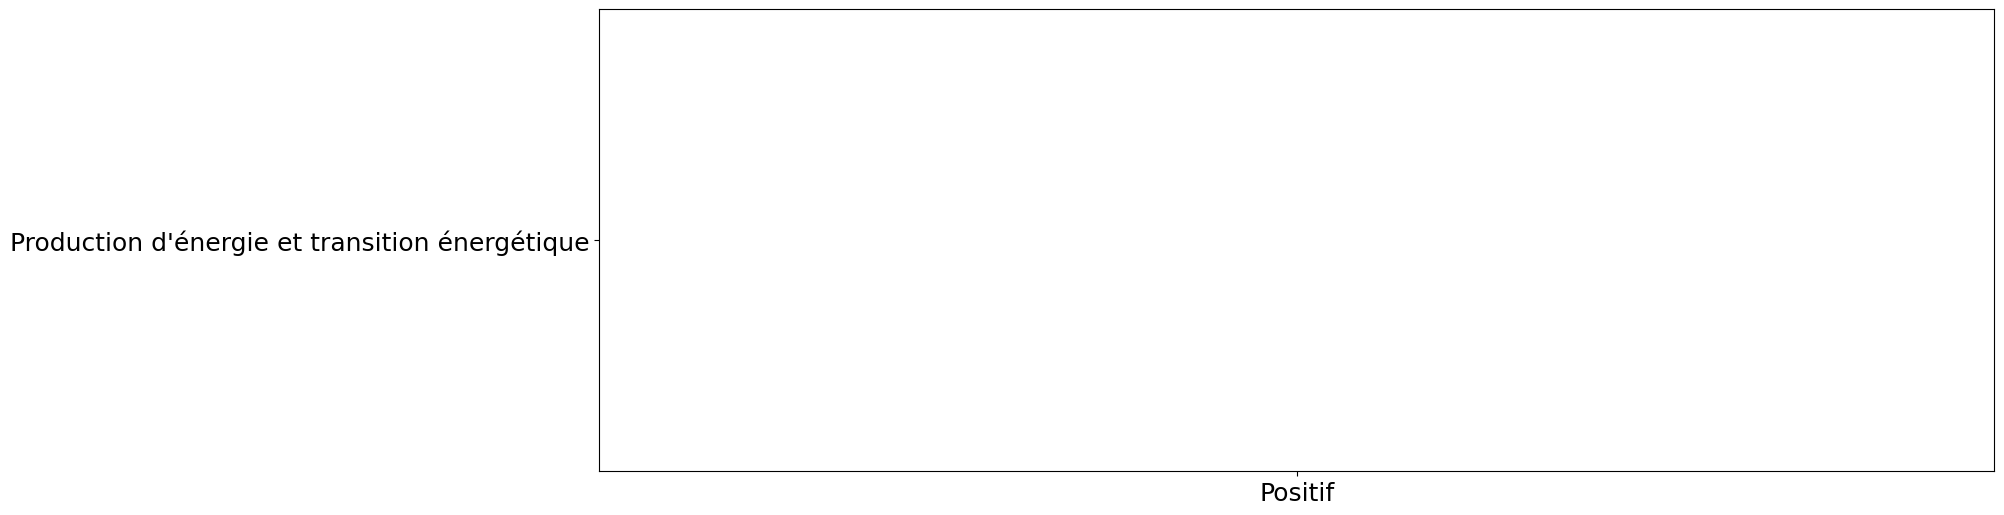

In [237]:
colors = pd.DataFrame(dfGlobal, columns=["Sentiment"])
y = pd.DataFrame(dfGlobal, columns=["Thème Énergétique"])
x = pd.factorize(dfGlobal["Thème Écologique"])[0]

plt.scatter(x="Sentiment", y="Thème Énergétique", c=colors, data=dfGlobal)
plt.xlabel('Sentiment')
plt.ylabel('Transition énergétique')
plt.show()

In [241]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X = dfGlobal[['Thème Écologique', 'Thème Énergétique', 'Sentiment']]

kmeans = KMeans(n_clusters=3).fit(X)

dfGlobal['cluster'] = kmeans.labels_

print(dfGlobal)

colors = ['red', 'blue', 'green']
for i in range(3):
    plt.scatter(data[data['cluster']==i]['Thème Écologique'], 
                data[data['cluster']==i]['Thème Énergétique'], 
                color=colors[i])
plt.xlabel('Thème transition écolo')
plt.ylabel('Thème transition énergétique')
plt.show()

ValueError: could not convert string to float: 'Santé et développement durable'

In [240]:
dfGlobal



,Content,Clean_Tweet,Date,Score,Compound,Sentiment,Thème TEner,Thème Énergétique,Thème TEco,Thème Écologique
0,"Ah, en effet..._x000D_\nLa transition écologiq...","[effetx000d, écologique, loccasion, tenter, ré...",2023-01-01,"{'neg': 0.0, 'neu': 0.896, 'pos': 0.104, 'comp...",0.2964,Positif,4,Production d'énergie et transition énergétique,4,Santé et développement durable
1,Méthode pour une transition écologique dans le...,"[méthode, écologique, grand, école, sénat, bit...",2023-01-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.0271,Neutre,1,"Énergie solaire, éolienne en France et dans le...",1,Soutien et financement de projets écologiques
2,Enseignement agricole et transition écologique...,"[enseignement, agricole, écologique, confisque...",2023-01-01,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",-0.0752,Negatif,14,Emploi et formation dans le secteur de l'énergie,14,Agricultures et politiques environnementales
3,la pollueuse de notre planète qui a des intérê...,"[pollueur, planèt, intérêt, industrie, pétroli...",2023-01-01,"{'neg': 0.107, 'neu': 0.839, 'pos': 0.054, 'co...",-0.4530,Negatif,3,Politique énergétique et environnementale,3,Énergie et économie vers une société écologique
4,Quand la transition écologique bouscule la pol...,"[écologique, bouscule, politique, x000d, risqu...",2023-01-01,"{'neg': 0.064, 'neu': 0.88, 'pos': 0.056, 'com...",0.1779,Positif,1,Politique énergétique en Allemagne,1,Soutien et financement de projets écologiques
...,...,...,...,...,...,...,...,...,...,...
4288,"Ils sont incompétents, ils n'ont rien réformé ...","[incompétent, nont, réformer, victimisent, mil...",2023-04-22,"{'neg': 0.167, 'neu': 0.725, 'pos': 0.108, 'co...",-0.3786,Negatif,0,Emploi et dynamique économique,0,Politiques environnementales et écologiques du...
4289,�� Pour profiter au mieux de la transition #én...,"[profiter, anticiper, inévitable, changement, ...",2023-04-22,"{'neg': 0.06, 'neu': 0.679, 'pos': 0.261, 'com...",0.8123,Positif,1,Stratégies économiques et environnementales,1,Soutien et financement de projets écologiques
4290,"�� En conclusion, la logistique urbaine est un...","[conclusion, logistique, urbain, enjeu, struct...",2023-04-22,"{'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...",0.8805,Positif,7,"Énergie solaire, éolienne en France et dans le...",7,Lutte contre le changement climatique et les é...
4291,"Pour aller + loin, rejoignez notre webinaire a...","[aller, loin, rejoindre, webinaire, acteur, do...",2023-04-22,"{'neg': 0.0, 'neu': 0.871, 'pos': 0.129, 'comp...",0.5994,Positif,11,Emploi et dynamique économique,11,Réformes écologiques et environnementales en F...
